In [1]:
import pyodbc
import pandas as pd
server='120.113.70.50,14333'  
database='DB11061124'         
username='U11061124'          
password='11061124'           
conn_str='DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+password
print(conn_str)

DRIVER={SQL Server};SERVER=120.113.70.50,14333;DATABASE=DB11061124;UID=U11061124;PWD=11061124


In [2]:
cnxn=pyodbc.connect(conn_str)
cursor=cnxn.cursor()
table='drug'             
sql=f"select * from {table}"
print(sql)
df=pd.read_sql(sql,cnxn)
cnxn.close()

df.head()

select * from drug


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [5]:
cnxn=pyodbc.connect(conn_str)
cursor=cnxn.cursor()
table='drug'             
sql=f"select * from {table}"
print(sql)
df=pd.read_sql(sql,cnxn)
cnxn.close()

df.head()

select * from drug


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [10]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [12]:
pip install termcolor

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=c2c63b7286c5950bebb9f1746751bd81f7f6442c0001a01b4a33838c33be609e
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor
Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd # 資料處理
import numpy as np # 使用陣列
import matplotlib.pyplot as plt # 視覺化
from matplotlib import rcParams # 圖大小
from termcolor import colored as cl # 文字自定義

from sklearn.tree import DecisionTreeClassifier as dtc # 樹演算法
from sklearn.model_selection import train_test_split # 拆分資料
from sklearn.metrics import accuracy_score # 模型準確度
from sklearn.tree import plot_tree # 樹圖

rcParams['figure.figsize'] = (25, 20)

In [15]:
#df = pd.read_csv('drug.csv')
#df.drop('Unnamed: 0', axis = 1, inplace = True)

print(cl(df.head(), attrs = ['bold']))

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY


In [18]:
print(df['Sex'].unique())
print(df['BP'].unique())
print(df['Cholesterol'].unique())

['F' 'M']
['HIGH' 'LOW' 'NORMAL']
['HIGH' 'NORMAL']


In [17]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df1=df[['Sex','BP','Cholesterol']]
print(df1.head())
enc.fit(df1)
enc.categories_
df2=enc.transform(df1)
df3=pd.DataFrame(df2)
print(df3.head())

  Sex      BP Cholesterol
0   F    HIGH        HIGH
1   M     LOW        HIGH
2   M     LOW        HIGH
3   F  NORMAL        HIGH
4   F     LOW        HIGH
     0    1    2
0  0.0  0.0  0.0
1  1.0  1.0  0.0
2  1.0  1.0  0.0
3  0.0  2.0  0.0
4  0.0  1.0  0.0


In [19]:
for i in df.Sex.values:
    if i  == 'M':
        df.Sex.replace(i, 0, inplace = True)
    else:
        df.Sex.replace(i, 1, inplace = True)

for i in df.BP.values:
    if i == 'LOW':
        df.BP.replace(i, 0, inplace = True)
    elif i == 'NORMAL':
        df.BP.replace(i, 1, inplace = True)
    elif i == 'HIGH':
        df.BP.replace(i, 2, inplace = True)

for i in df.Cholesterol.values:
    if i == 'LOW':
        df.Cholesterol.replace(i, 0, inplace = True)
    else:
        df.Cholesterol.replace(i, 1, inplace = True)

print(cl(df, attrs = ['bold']))

     Age  Sex  BP  Cholesterol  Na_to_K   Drug
0     23    1   2            1   25.355  DrugY
1     47    1   0            1   13.093  drugC
2     47    1   0            1   10.114  drugC
3     28    1   1            1    7.798  drugX
4     61    1   0            1   18.043  DrugY
..   ...  ...  ..          ...      ...    ...
195   56    1   0            1   11.567  drugC
196   16    1   0            1   12.006  drugC
197   52    1   1            1    9.894  drugX
198   23    1   1            1   14.020  drugX
199   40    1   0            1   11.349  drugX

[200 rows x 6 columns]


In [20]:
X_var = df[['Sex', 'BP', 'Age', 'Cholesterol', 'Na_to_K']].values # 自變數
y_var = df['Drug'].values # 因變數

print(cl('X variable samples : {}'.format(X_var[:5]), attrs = ['bold']))
print(cl('Y variable samples : {}'.format(y_var[:5]), attrs = ['bold']))

X variable samples : [[ 1.     2.    23.     1.    25.355]
 [ 1.     0.    47.     1.    13.093]
 [ 1.     0.    47.     1.    10.114]
 [ 1.     1.    28.     1.     7.798]
 [ 1.     0.    61.     1.    18.043]]
Y variable samples : ['DrugY' 'drugC' 'drugC' 'drugX' 'DrugY']


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)

print(cl('X_train shape : {}'.format(X_train.shape), attrs = ['bold']))
print(cl('X_test shape : {}'.format(X_test.shape), attrs = ['bold']))
print(cl('y_train shape : {}'.format(y_train.shape), attrs = ['bold']))
print(cl('y_test shape : {}'.format(y_test.shape), attrs = ['bold']))

X_train shape : (160, 5)
X_test shape : (40, 5)
y_train shape : (160,)
y_test shape : (40,)


In [24]:
model = dtc(criterion = 'entropy', max_depth = 4)
model.fit(X_train, y_train)

pred_model = model.predict(X_test)

print(cl('Accuracy of the model is {:.0%}'.format(accuracy_score(y_test, pred_model)), attrs = ['bold']))

Accuracy of the model is 88%


In [25]:
print(y_test)
print(pred_model)

['drugC' 'drugX' 'DrugY' 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugX' 'DrugY'
 'drugX' 'drugA' 'DrugY' 'DrugY' 'DrugY' 'drugB' 'drugC' 'DrugY' 'DrugY'
 'drugX' 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugX' 'DrugY' 'DrugY' 'DrugY'
 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugC' 'drugA' 'drugX' 'DrugY' 'DrugY'
 'drugX' 'DrugY' 'drugA' 'drugX']
['drugC' 'drugX' 'DrugY' 'DrugY' 'DrugY' 'drugC' 'drugX' 'drugC' 'DrugY'
 'drugX' 'drugA' 'DrugY' 'DrugY' 'DrugY' 'drugB' 'drugC' 'DrugY' 'DrugY'
 'drugX' 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugC' 'DrugY' 'DrugY' 'DrugY'
 'DrugY' 'DrugY' 'drugX' 'drugC' 'drugX' 'drugA' 'drugX' 'DrugY' 'DrugY'
 'drugX' 'DrugY' 'drugA' 'drugX']


[Text(930.0, 978.48, 'X[4] <= 14.829\nentropy = 2.008\nsamples = 160\nvalue = [72, 20, 15, 13, 40]'),
 Text(775.0, 761.0400000000001, 'X[1] <= 1.5\nentropy = 1.846\nsamples = 88\nvalue = [0, 20, 15, 13, 40]'),
 Text(465.0, 543.6, 'X[1] <= 0.5\nentropy = 0.804\nsamples = 53\nvalue = [0, 0, 0, 13, 40]'),
 Text(310.0, 326.1600000000001, 'X[4] <= 13.362\nentropy = 1.0\nsamples = 26\nvalue = [0, 0, 0, 13, 13]'),
 Text(155.0, 108.72000000000003, 'entropy = 0.988\nsamples = 23\nvalue = [0, 0, 0, 13, 10]'),
 Text(465.0, 108.72000000000003, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 0, 0, 3]'),
 Text(620.0, 326.1600000000001, 'entropy = 0.0\nsamples = 27\nvalue = [0, 0, 0, 0, 27]'),
 Text(1085.0, 543.6, 'X[2] <= 50.5\nentropy = 0.985\nsamples = 35\nvalue = [0, 20, 15, 0, 0]'),
 Text(930.0, 326.1600000000001, 'entropy = 0.0\nsamples = 20\nvalue = [0, 20, 0, 0, 0]'),
 Text(1240.0, 326.1600000000001, 'entropy = 0.0\nsamples = 15\nvalue = [0, 0, 15, 0, 0]'),
 Text(1085.0, 761.0400000000001, 'entro

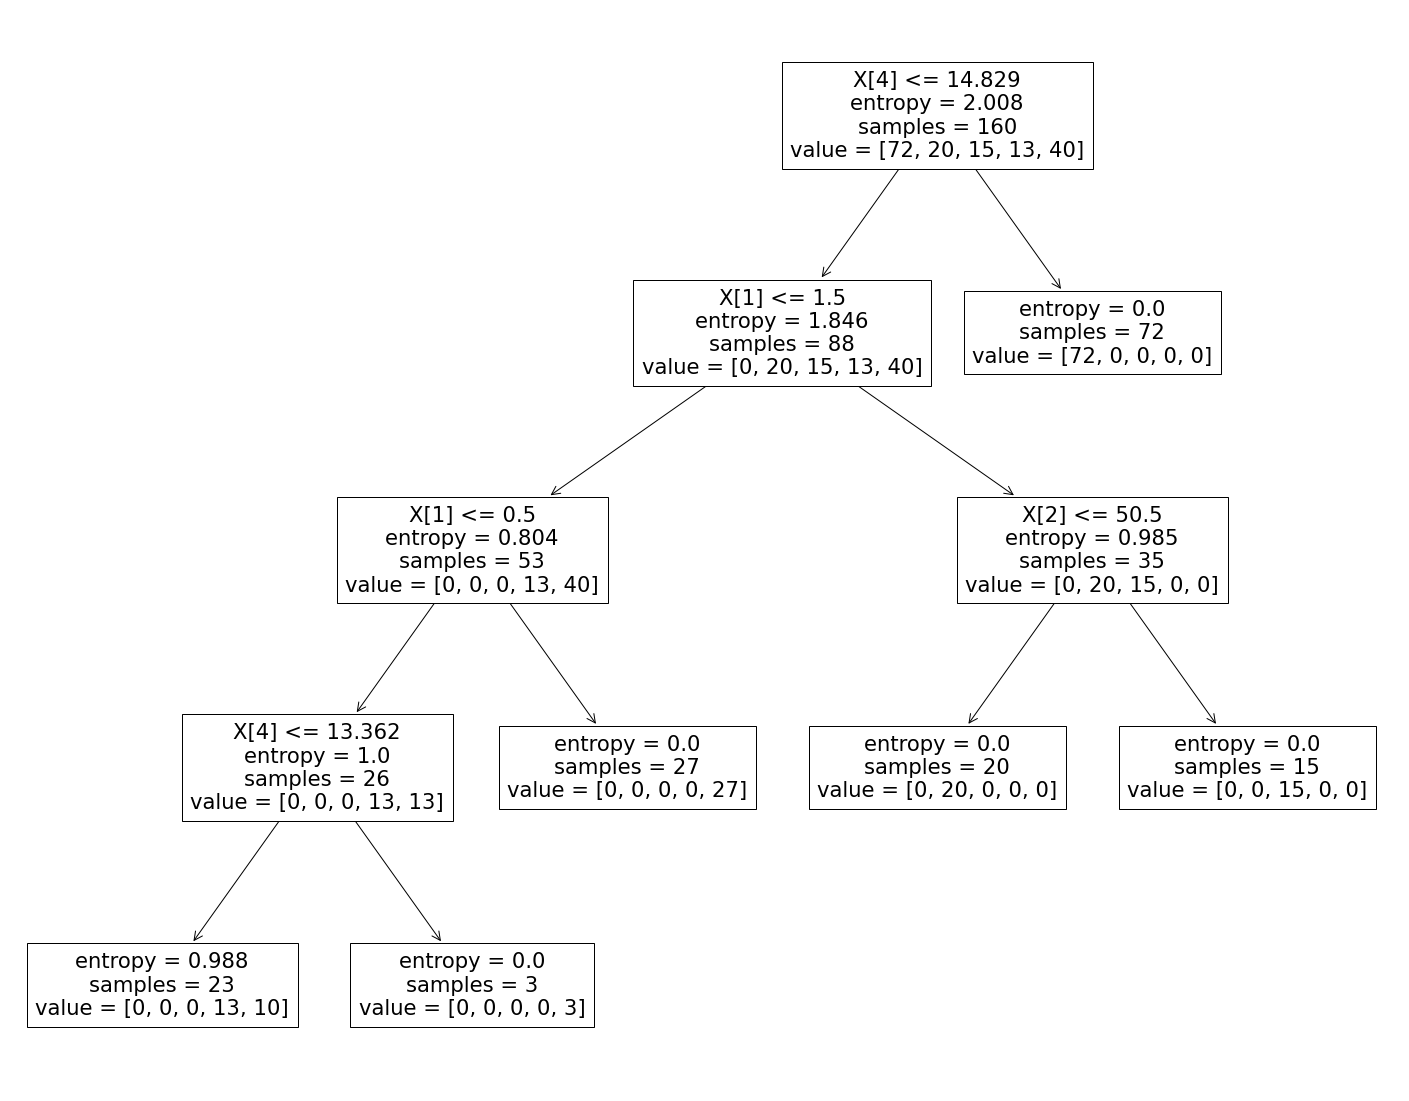

In [36]:
plot_tree(model)

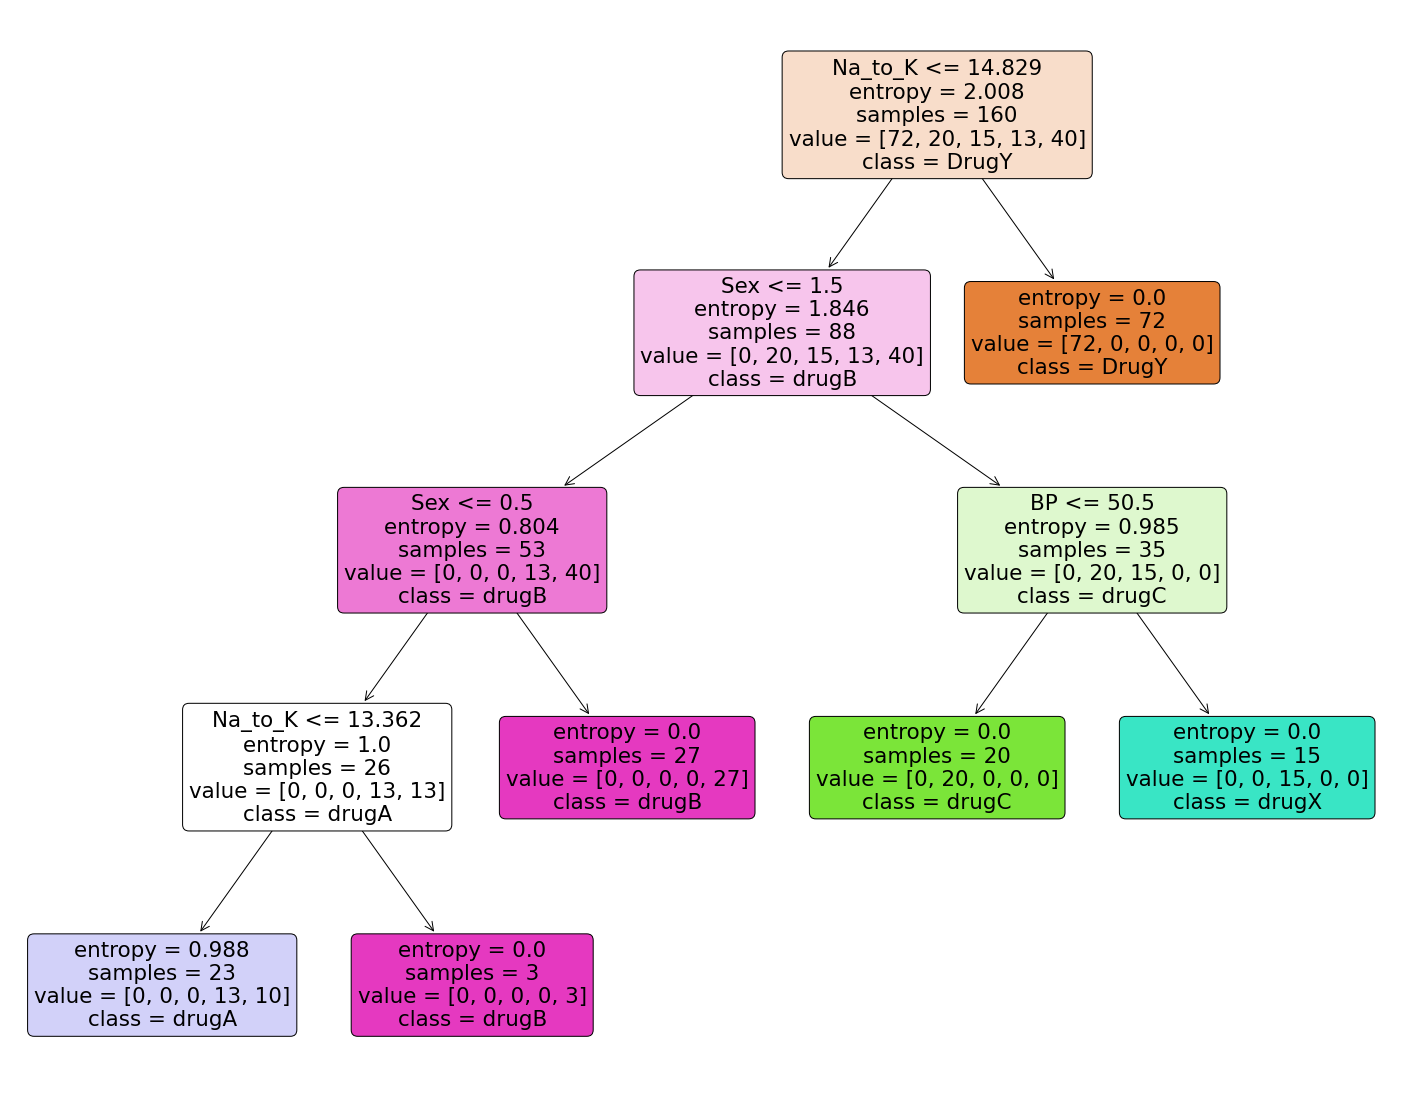

In [37]:
feature_names = df.columns[:5]
target_names = df['Drug'].unique().tolist()

plot_tree(model, 
          feature_names = feature_names, 
          class_names = target_names, 
          filled = True, 
          rounded = True)

plt.savefig('tree_visualization.png') 

In [40]:
from sklearn import tree
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_4 <= 14.83
|   |--- feature_1 <= 1.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- feature_4 <= 13.36
|   |   |   |   |--- class: drugC
|   |   |   |--- feature_4 >  13.36
|   |   |   |   |--- class: drugX
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: drugX
|   |--- feature_1 >  1.50
|   |   |--- feature_2 <= 50.50
|   |   |   |--- class: drugA
|   |   |--- feature_2 >  50.50
|   |   |   |--- class: drugB
|--- feature_4 >  14.83
|   |--- class: DrugY



In [43]:
print(list(feature_names))
text_representation = tree.export_text(model, feature_names=list(feature_names))
print(text_representation)

['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
|--- Na_to_K <= 14.83
|   |--- Sex <= 1.50
|   |   |--- Sex <= 0.50
|   |   |   |--- Na_to_K <= 13.36
|   |   |   |   |--- class: drugC
|   |   |   |--- Na_to_K >  13.36
|   |   |   |   |--- class: drugX
|   |   |--- Sex >  0.50
|   |   |   |--- class: drugX
|   |--- Sex >  1.50
|   |   |--- BP <= 50.50
|   |   |   |--- class: drugA
|   |   |--- BP >  50.50
|   |   |   |--- class: drugB
|--- Na_to_K >  14.83
|   |--- class: DrugY



In [46]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    feature_names = [f.replace(" ", "_")[:-5] for f in feature_names]
    print("def predict({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "    " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, np.round(threshold,2)))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, np.round(threshold,2)))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

In [47]:
tree_to_code(model,list(feature_names))

def predict(, , , Choles, Na):
    if Na_to_K <= 14.83:
        if Sex <= 1.5:
            if Sex <= 0.5:
                if Na_to_K <= 13.36:
                    return [[ 0.  0.  0. 13. 10.]]
                else:  # if Na_to_K > 13.36
                    return [[0. 0. 0. 0. 3.]]
            else:  # if Sex > 0.5
                return [[ 0.  0.  0.  0. 27.]]
        else:  # if Sex > 1.5
            if BP <= 50.5:
                return [[ 0. 20.  0.  0.  0.]]
            else:  # if BP > 50.5
                return [[ 0.  0. 15.  0.  0.]]
    else:  # if Na_to_K > 14.83
        return [[72.  0.  0.  0.  0.]]


In [49]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [50]:
rules = get_rules(model,list(feature_names),target_names)
for r in rules:
    print(r)

if (Na_to_K > 14.829) then class: DrugY (proba: 100.0%) | based on 72 samples
if (Na_to_K <= 14.829) and (Sex <= 1.5) and (Sex > 0.5) then class: drugB (proba: 100.0%) | based on 27 samples
if (Na_to_K <= 14.829) and (Sex <= 1.5) and (Sex <= 0.5) and (Na_to_K <= 13.362) then class: drugA (proba: 56.52%) | based on 23 samples
if (Na_to_K <= 14.829) and (Sex > 1.5) and (BP <= 50.5) then class: drugC (proba: 100.0%) | based on 20 samples
if (Na_to_K <= 14.829) and (Sex > 1.5) and (BP > 50.5) then class: drugX (proba: 100.0%) | based on 15 samples
if (Na_to_K <= 14.829) and (Sex <= 1.5) and (Sex <= 0.5) and (Na_to_K > 13.362) then class: drugB (proba: 100.0%) | based on 3 samples
